### Oppstart

### Preamble

In [1]:
import dhlab.nbtext as nb
import os
from nbtext import vekstdiagram, make_graph, get_urn, relaterte_ord

%matplotlib inline

In [2]:
from dhlab.module_update import update, css, printmd
update('mods_meta')
from mods_meta import book_info

Updated file `D:\Documents\GitHub\Lokalhistorie\mods_meta.py`

In [3]:
css()

# To hjelpekommandoer for metadata og plotting

In [4]:
# lokal metadata

def local_metadata(urns, heading=['urn', 'forfatter','år', 'tittel']):
    """A list of urns are processed"""
    md = []
    if isinstance(urns, str) or isinstance(urns, int):
        urns = [str(urns)]
    for urn in urns:
        try:
            md.append(nb.metadata(urn)[0][0:4])
        except:
            info = book_info(urn)
            authors = ' & '.join([x[0] for x in info[0]])
            year = info[5]
            title = info[3]
            md.append([urn, authors, year,title])
    return nb.frame(md, heading)

In [5]:
urnlist = []
def plot(urn , wordbag, window = 5000, pr = 100, lw = 3, alpha = 0.8, title = True, korpus = urnlist):
    
    #print(md)
    x = nb.plot_book_wordbags(urn , wordbag, window=window, pr=pr)
    if title == True:
        md = list(local_metadata(urn).iloc[0])
        titleline = ', '.join([str(m) for m in md])
        x.plot(figsize=(12, 5), lw=lw, alpha=alpha, title = titleline)
        
    elif title != False:
        x.plot(figsize=(12, 5), lw=lw, alpha=alpha, title = title)
    else:
        x.plot(figsize=(12, 5), lw=lw, alpha=alpha)
    
    

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Hent korpusfiler

In [7]:

_,_,korpusfiles = next(os.walk('./Analysekorpus'))
bb_korpus = dict()
for f in korpusfiles:
    bb_korpus[f.split('.docx')[0]] = list(set(nb.get_urns_from_docx(os.path.join('./Analysekorpus', f))))
#printmd("""## Delkorpus: \n {defs}""".format(defs = '\n\n 1. ' + '\n\n 1. '.join(list(bb_korpus.keys()))))
printmd("""### Korpus definert""")


### Korpus definert

## Liste over URNene i korpuset med metadata. 

URN-ene ligger i BB.Urn.alle

In [8]:
bb_korpus['BB.Urn.alle']

['2017012748214',
 '2016090948140',
 '2013091708049',
 '2012010524015',
 '2011032108123',
 '2008090904023',
 '2009061104017',
 '2015102906004',
 '2018030748131',
 '2017091948021',
 '2007121004104',
 '2010072008014',
 '2017040348068',
 '2012071138010',
 '2015082548199',
 '2010110808243',
 '2015013008162',
 '2017010648094',
 '2014013105049',
 '2008031104030',
 '2017081748043',
 '2014061948027',
 '2010102820005',
 '2011091608262',
 '2011061605068',
 '2017030648010',
 '2011062108082',
 '2007081400029',
 '2013101708020',
 '2013082606089',
 '2010030810009',
 '2013091038001',
 '2011022808075',
 '2011080508017',
 '2013062038075',
 '2017030648007',
 '2010030810007',
 '2011091408122',
 '2014090306064',
 '2013101808032',
 '2015031629001',
 '2017120548055',
 '2015090348036',
 '2017012748211',
 '2014100338137',
 '2010092203016',
 '2008052900048',
 '2011051608083',
 '2013091738015',
 '2007083104015',
 '2013050707014',
 '2015092329005',
 '2011010603001',
 '2008052600012',
 '2011022808060',
 '20170306

In [9]:
urnlist = local_metadata(bb_korpus['BB.Urn.alle'])
urnlist

,urn,forfatter,år,tittel
0,2017012748214,"Dehli, Martin",1994,Varteig kommune
1,2016090948140,"Paulsen, Helge",1986,Nøtterøy
2,2013091708049,"Nordås, Hallvard",1989,1870-1989
3,2012010524015,"Abrahamsen, Olav Arild",1994,1940-1964
4,2011032108123,"Eliassen, Sven G.",2004,1930-1992
5,2008090904023,"Gjerdåker, Brynjulv",1998,Stiftstad og bygdeby
6,2009061104017,"Nordby, Guro",2002,Rakkestads historie
7,2015102906004,"Olstad, Finn",1997,defjords historie
8,2018030748131,"Asphaug, Arne & Øygarden & Asphaug, Arne, 1954-",2004,Øygarden
9,2017091948021,"Iversen, Klaus & Hammerfest",1989,"Krise, utslettelse og nytt liv"


### Finne frem til bøker

Bruk **urnlist** for å referere til en bok. Cellen under gir et idiom for å finne frem bøker basert på forfatter. Det er mulig å lage kortkommandoer som gjør ting litt enklere, bare si fra hvordan dere vil det skal være. Hvis det er greit som det vises i cellen under, går det fint. Bare bytt ut forfatternavnet med et annet. 

In [10]:
forfatter = lambda x: urnlist[urnlist['forfatter'].str.contains(x)]
tittel = lambda x: urnlist[urnlist['tittel'].str.contains(x)]

In [11]:
forfatter('Alsvik')

,urn,forfatter,år,tittel
35,2017030648007,"Alsvik, Jan & Alsvik, Marit Karin & Alsvik, Ja...",1991,Strand bygdebok
42,2015090348036,"Alsvik, Ola",2006,Storkommunen
58,2011031103008,"Alsvik, Ola",1998,Historien om Lørenskog
139,2013062406124,"Alsvik, Ola",2001,I krig og fred
175,2013091708048,"Alsvik, Jan",1989,1800-1870
177,2017030648006,"Alsvik, Jan & Alsvik, Marit Karin & Alsvik, Ja...",1991,Strand bygdebok


In [12]:
tittel('kommune')

,urn,forfatter,år,tittel
0,2017012748214,"Dehli, Martin",1994,Varteig kommune
34,2013062038075,"Evjen, Bjørg",1998,fjord kommune
42,2015090348036,"Alsvik, Ola",2006,Storkommunen
59,2015072308166,"Jansen, Leonhard B.",1994,Valle kommune
131,2013061938074,"Evjen, Bjørg",2001,Tysfjord kommune


In [13]:
urnlist[urnlist['forfatter'].str.contains('Alsvi')]

,urn,forfatter,år,tittel
35,2017030648007,"Alsvik, Jan & Alsvik, Marit Karin & Alsvik, Ja...",1991,Strand bygdebok
42,2015090348036,"Alsvik, Ola",2006,Storkommunen
58,2011031103008,"Alsvik, Ola",1998,Historien om Lørenskog
139,2013062406124,"Alsvik, Ola",2001,I krig og fred
175,2013091708048,"Alsvik, Jan",1989,1800-1870
177,2017030648006,"Alsvik, Jan & Alsvik, Marit Karin & Alsvik, Ja...",1991,Strand bygdebok


### Sett av ord for å sjekke mot. 

Lag en liste av ord for å se utviklingen, listen kan være enkeltord er flere ord. Definer dem som i mønsteret nedenfor, og sett variabelen inn i kommandoen for vekstdiagrammet. 

In [14]:
traktor = """traktor, Traktor, traktoren, Traktoren""".split(', ')

In [15]:
gårdsord = """låve, Låve, Låven, låven, fjøs, fjøsen, fjøset, Fjøsen, Fjøset""".split(', ')

In [16]:
kvinneord = """kvinnfolk, kvinnfolka, kvinnfolket, kvinner, jenter, jenta, jenten, datter, dattera, kone, konen""".split(', ')

## Lag buer for ordene i en bestemt bok

Finn URN-en som i ovenfor, klipp ut selve URN-referansen og lim inn den inn i kommandoen under. Kopier cellen og lim inn så mange kopier det trengs.

In [17]:
sammenlign = lambda x, y, z: (plot(x , z, window=5000, pr=100),
plot(y ,z, window=5000, pr=100))

In [18]:
tallord = ['hundre', 'tusen', 'tjue','tyve','tredve']

In [20]:
nb.plot_book_wordbags(2018032348039 , {'Q': kvinneord, 'Tallord':tallord, 'Helse':['helse', 'sykdom','sanitetsforeningen']}, window=4000, pr=100)

,Helse,Q,Tallord
0,NaN,1.0,NaN
1,NaN,1.0,NaN
2,NaN,1.0,NaN
3,NaN,1.0,NaN
4,NaN,1.0,NaN
5,NaN,1.0,NaN
6,NaN,1.0,NaN
7,NaN,1.0,NaN
8,NaN,1.0,NaN
9,NaN,1.0,NaN


(None, None)

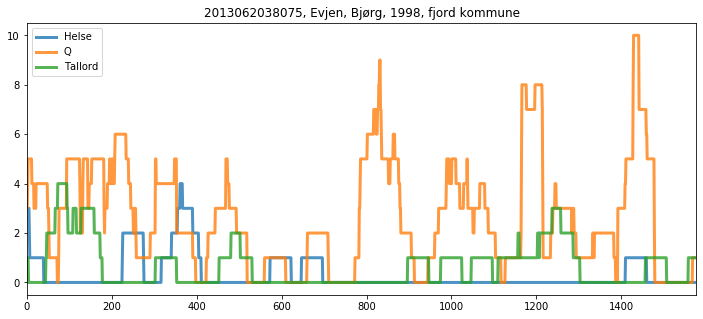

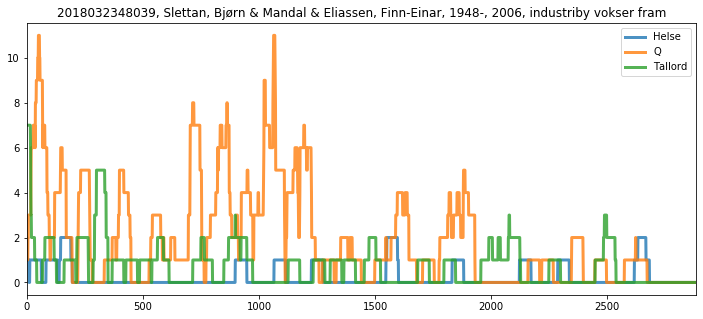

In [21]:
sammenlign(2013062038075, 2018032348039 , {'Q': kvinneord, 'Tallord':tallord, 'Helse':['helse', 'sykdom','sanitetsforeningen']})